In [34]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt


fatal: destination path 'twint' already exists and is not an empty directory.
/content/twint/twint
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [49]:
import twint
import nest_asyncio
nest_asyncio.apply()

c = twint.Config()

c.Username = "SenSanders"
c.Custom["tweet"] = ["id"]
c.Custom["user"] = ["bio"]


#looking for dates from March 1 to July 28 (present day), limit of tweets set at 1500 for now, can be increased if necessary (but unlikely)

c.Limit = 4000
#import datetime
#since = str(datetime.datetime(2021, 3, 1))
#until = str(datetime.datetime(2021, 9, 10))

#c.Since = since
#c.Until = until
c.Pandas = True
c.Store_csv = True
c.Output = "tweets_bernie"
c.Store_object=False



twint.run.Search(c)

1436017494200922112 2021-09-09 17:23:45 +0000 <SenSanders> I have absolute confidence that if we have the courage and the determination to stand together and fight for justice, not only can we address the enormous crises that we face, but I believe we can move this country in a much stronger and better direction.  https://t.co/o8gr8P6E6S
1435674754988580869 2021-09-08 18:41:49 +0000 <SenSanders> At a time of massive wealth and income inequality, we can no longer tolerate a rigged tax system that allows the top 1% to avoid $163 billion in taxes that they owe. Yes, we will demand that the 1% pays its fair share and we will use that revenue to invest in working families.
1435619212924538884 2021-09-08 15:01:07 +0000 <SenSanders> The science is clear: if we do not address climate change now, we will suffer greater and more frequent climate disasters and the Earth will become increasingly uninhabitable.    It’s time we listen to scientists, not the fossil fuel industry.
1435397638262767621 

In [46]:
Tweets_df = twint.storage.panda.Tweets_df

In [47]:
Tweets_df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1436017494200922112,1436017494200922112,1.631208e+12,2021-09-09 17:23:45,+0000,,I have absolute confidence that if we have the...,en,[],[],29442313,29442313,SenSanders,Bernie Sanders,4,17,https://twitter.com/SenSanders/status/14360174...,[],[],1,https://pbs.twimg.com/amplify_video_thumb/1436...,False,2359,191,355,,None,,,,,,,[],,,,
1,1435674754988580869,1435674754988580869,1.631127e+12,2021-09-08 18:41:49,+0000,,At a time of massive wealth and income inequal...,en,[],[],29442313,29442313,SenSanders,Bernie Sanders,3,18,https://twitter.com/SenSanders/status/14356747...,[],[],0,,False,6926,463,989,,None,,,,,,,[],,,,
2,1435619212924538884,1435619212924538884,1.631113e+12,2021-09-08 15:01:07,+0000,,The science is clear: if we do not address cli...,en,[],[],29442313,29442313,SenSanders,Bernie Sanders,3,15,https://twitter.com/SenSanders/status/14356192...,[],[],0,,False,17518,636,2807,,None,,,,,,,[],,,,
3,1435397638262767621,1435397638262767621,1.631060e+12,2021-09-08 00:20:40,+0000,,"Yes, we are going to raise taxes on large, pro...",en,[],[],29442313,29442313,SenSanders,Bernie Sanders,3,00,https://twitter.com/SenSanders/status/14353976...,[],[],0,,False,16619,819,1531,,None,,,,,,,[],,,,
4,1435321693556387846,1435321693556387846,1.631042e+12,2021-09-07 19:18:53,+0000,,For too many years the government has been the...,en,[],[],29442313,29442313,SenSanders,Bernie Sanders,2,19,https://twitter.com/SenSanders/status/14353216...,[],[],0,,False,10295,638,1330,,None,,,,,,,[],,,,
5,1434894185962819590,1434894185962819590,1.630940e+12,2021-09-06 15:00:07,+0000,,On this Labor Day we thank the trade union mov...,en,[],[],29442313,29442313,SenSanders,Bernie Sanders,1,15,https://twitter.com/SenSanders/status/14348941...,[],[],0,,False,12648,326,1916,,None,,,,,,,[],,,,
6,1434667193388707841,1434667191681552389,1.630886e+12,2021-09-05 23:58:08,+0000,,"There will be special guests, good music and g...",en,[],[],29442313,29442313,SenSanders,Bernie Sanders,7,23,https://twitter.com/SenSanders/status/14346671...,[https://www.sanders.senate.gov/events/],[],0,,False,770,46,96,,None,,,,,,,[],,,,
7,1434667191681552389,1434667191681552389,1.630886e+12,2021-09-05 23:58:07,+0000,,Thank you to the over 900 Vermonters who joine...,en,[],[],29442313,29442313,SenSanders,Bernie Sanders,7,23,https://twitter.com/SenSanders/status/14346671...,[],[https://pbs.twimg.com/media/E-j2NKSWYAUYvAX.j...,1,https://pbs.twimg.com/media/E-j2NKSWYAUYvAX.jpg,False,2574,98,240,,None,,,,,,,[],,,,
8,1434185099973742599,1434185099973742599,1.630771e+12,2021-09-04 16:02:28,+0000,,Let's be clear. Climate change is causing deva...,en,[],[],29442313,29442313,SenSanders,Bernie Sanders,6,16,https://twitter.com/SenSanders/status/14341850...,[],[],0,,False,34407,1968,4490,,None,,,,,,,[],,,,
9,1433898623553740804,1433898623553740804,1.630703e+12,2021-09-03 21:04:07,+0000,,There is an enormous amount of work to be done...,en,[],[],29442313,29442313,SenSanders,Bernie Sanders,5,21,https://twitter.com/SenSanders/status/14338986...,[],[],0,,False,4768,324,591,,None,,,,,,,[],,,,


### **All Together**

Hi Ashvin, this is Evan. You can seperate the dataframes with the states as you were doing above, or I think the better way might be to create a for loop with the Twitter usernames. You can then find each state, based on the Twitter username in the dataframe column. Look below for an example

In [43]:
stateDict = {"ALPublicHealth" : "AL",
             "Alaska_DHSS" : "AK",
             "AZDHS" : "AZ",
             "ADHPIO" : "AR",
             "CAPublicHealth" : "CA",
             "CDPHE" : "CO",
             "CTDPH" : "CT",
             "Delaware_DHSS" : "DE",
             "HealthyFla" : "FL",
             "GaDPH" : "GA",
             "HawaiiDOH" : "HI",
             "IDHW" : "ID",
             "IDPH" : "IL",
             "StateHealthIN" : "IN",
             "IAPublicHealth" : "IA",
             "KDHE" : "KS",
             "KYHealthAlerts" : "KY",
             "LADeptHealth" : "LA",
             "MaineDHHS" : "ME",
             "MDHealthDept" : "MD",
             "MassDPH" : "MA",
             "MichiganHHS" : "MI",
             "mnhealth" : "MN",
             "msdh" : "MS",
             "HealthyLivingMo" : "MO",
             "DPHHSMT" : "MT",
             "NEDHHS" : "NE",
             "DhhsNevada" : "NV",
             "NHPubHealth" : "NH",
             "NJDeptofHealth" : "NJ",
             "NMDOH" : "NM",
             "HealthNYGov" : "NY",
             "ncdhhs" : "NC",
             "NDDOH" : "ND",
             "OHdeptofhealth" : "OH",
             "HealthyOklahoma" : "OK",
             "OHAOregon" : "OR",
             "PAHealthDept" : "PA",
             "RIHEALTH" : "RI",
             "scdhec" : "SC",
             "SDDOH" : "SD",
             "TNDeptofHealth" : "TN",
             "TexasDSHS" : "TX",
             "UtahDepOfHealth" : "UT",
             "healthvermont" : "VT",
             "VDHgov" : "VA",
             "WADeptHealth" : "WA",
             "WV_DHHR" : "WV",
             "DHSWI" : "WI",
             "health_wyoming" : "WY"
            }

In [39]:
import pandas as pd
All_states_df= pd.DataFrame()

for state in ["ALPublicHealth","Alaska_DHSS","AZDHS", "ADHPIO","CAPublicHealth","CDPHE","CTDPH","Delaware_DHSS","HealthyFla","GaDPH","HawaiiDOH","IDHW","IDPH","StateHealthIN","IAPublicHealth","KDHE","KYHealthAlerts","LADeptHealth","MaineDHHS","MDHealthDept","MassDPH","MichiganHHS","mnhealth","msdh","HealthyLivingMo","DPHHSMT","NEDHHS","DhhsNevada","NHPubHealth","NJDeptofHealth","NMDOH","HealthNYGov","ncdhhs","NDDOH","OHdeptofhealth","HealthyOklahoma","OHAOregon","PAHealthDept","RIHEALTH","scdhec","SDDOH","TNDeptofHealth","TexasDSHS","UtahDepOfHealth","healthvermont","VDHgov","WADeptHealth","WV_DHHR","DHSWI","health_wyoming"]:
  c.Username = state
  c.Search = "COVID vaccine OR vaccinated OR vaccination"
  twint.run.Search(c)
  Tweets_df = twint.storage.panda.Tweets_df
  All_states_df = pd.concat([All_states_df,Tweets_df])

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1419815255853572097 2021-07-27 00:21:50 +0000 <Alaska_DHSS> COVID-19 UPDATE 7/26/21 The statewide alert level is high at 22.8 per 100,000 and 52% of Alaskans (12+) have been fully vaccinated. 562 new people identified in AK over last three days: July 23 – 246 residents, 20 nonresidents; July 24 – 169 residents, 3 nonresidents...  https://t.co/Wfv6bbSO4y
1419717653006929920 2021-07-26 17:54:00 +0000 <Alaska_DHSS> Reason #8️⃣ for Alaskans to get immunized against COVID-19: Enjoy peace of mind. Vaccinated people are much less likely to become infected with COVID-19 or its variants and are extremely well protected against severe illness or death caused by COVID.  https://t.co/eaCCU4Sn3i  https://t.co/DW7oxilnN2
1419369106462101512 2021-07-25 18:49:00 +0000 <Alaska_DHSS> Reason #7 Alaskans should get their COVID-19 vaccine: 7⃣Getting vaccinated helps prevent long-term COVID-19 symptoms like fatigue, cough, head

### **Analysis**

In [12]:
fr = All_states_df['username'].value_counts(sort=True)

In [13]:
df = fr.to_frame()


In [14]:
s = df.index.to_series()
df.index = s.map(stateDict).fillna(s)

In [15]:
!pip install sodapy

In [16]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("unsk-b7fc", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()


results_df = results_df.loc[results_df['date'] == '2021-08-12T00:00:00.000']

results_df = results_df.set_index('location')



In [17]:
data = df.join(results_df)

In [18]:
data = data.drop(columns=['mmwr_week','distributed', 'distributed_janssen', 'distributed_moderna','distributed_pfizer','distributed_unk_manuf','dist_per_100k','distributed_per_100k_12plus','distributed_per_100k_18plus','distributed_per_100k_65plus','administered_65plus','administered','administered_12plus'])


In [19]:
data = data.drop(columns=['administered_18plus','administered_janssen', 'administered_fed_ltc_residents', 'administered_pfizer','administered_unk_manuf','administered_fed_ltc_dose1_3','series_complete_yes','recip_administered','series_complete_pfizer_12plus','series_complete_fedltc_1','series_complete_pfizer_65plus','admin_per_100k_12plus','administered_dose1_recip_5'])


In [20]:
data = data.rename(columns = {"username" : "tweets"})

In [21]:
data.columns

Index(['tweets', 'date', 'administered_moderna', 'administered_fed_ltc',
       'administered_fed_ltc_staff', 'administered_fed_ltc_unk',
       'administered_fed_ltc_dose1', 'administered_fed_ltc_dose1_1',
       'administered_fed_ltc_dose1_2', 'admin_per_100k',
       'admin_per_100k_18plus', 'admin_per_100k_65plus',
       'administered_dose1_recip', 'administered_dose1_pop_pct',
       'administered_dose1_recip_1', 'administered_dose1_recip_2',
       'administered_dose1_recip_3', 'administered_dose1_recip_4',
       'administered_dose1_recip_6', 'series_complete_pop_pct',
       'series_complete_12plus', 'series_complete_12pluspop',
       'series_complete_18plus', 'series_complete_18pluspop',
       'series_complete_65plus', 'series_complete_65pluspop',
       'series_complete_janssen', 'series_complete_moderna',
       'series_complete_pfizer', 'series_complete_unk_manuf',
       'series_complete_janssen_12plus', 'series_complete_moderna_12plus',
       'series_complete_unk_manu

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [23]:
data['series_complete_pop_pct'] = data['series_complete_pop_pct'].apply(lambda x:float(x))


-0.2584847878401307

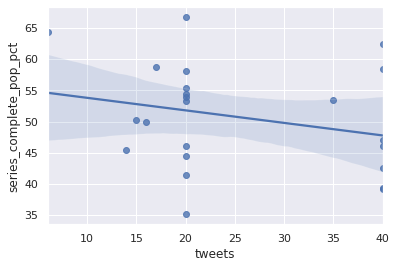

In [24]:
#unemployment rate vs one dose
sns.regplot(x="tweets", y="series_complete_pop_pct", data=data);
data['tweets'].corr(data['series_complete_pop_pct'])

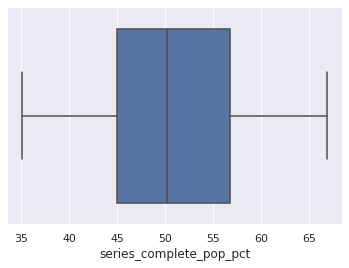

In [25]:
ax = sns.boxplot(x=data["series_complete_pop_pct"])


In [26]:
data.loc[(data.series_complete_pop_pct<20), "percent"] = 10

In [27]:
data.loc[(data.series_complete_pop_pct >= 20) & (data.series_complete_pop_pct<30), "percent"] = 20

In [28]:
data.loc[(data.series_complete_pop_pct >= 30) & (data.series_complete_pop_pct<40), "percent"] = 30

In [29]:
data.loc[(data.series_complete_pop_pct >= 40) & (data.series_complete_pop_pct<50), "percent"] = 40

In [30]:
data.loc[(data.series_complete_pop_pct >= 50) & (data.series_complete_pop_pct<60), "percent"] = 50

In [31]:
data.loc[(data.series_complete_pop_pct >= 60) & (data.series_complete_pop_pct<70), "percent"] = 60

In [32]:
data.loc[(data.series_complete_pop_pct >= 70), "percent"] = 70

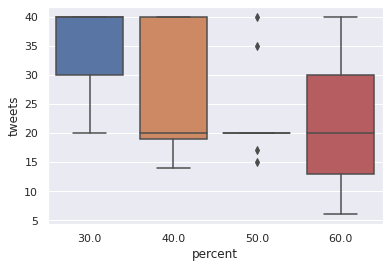

In [33]:
ax2 = sns.boxplot(x="percent", y="tweets", data=data)
